# WCWH Rollout Preparation
Working to get the beacons ready for their next adventure. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Calibration Inspection
Looking at the results from the calibration experiments

In [2]:
import os
import sys
sys.path.append('../')

import pandas as pd
pd.set_option('display.max_columns', 200)
import numpy as np

from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
from src.visualization import visualize
from src.processing import process

from src.calibration import calibrate, comparison

import math
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

%load_ext autoreload
%autoreload 2

---

<a id="toc"></a>

# Table of Contents

1. References
2. [Model Comparison](#model_comparison)
    1. [Carbon Dioxide](#co2_comparison)
    2. [PM2.5](#pm2p5_comparison)

---

# References

## Programming
* [Set `zorder` with seabron-generated figures](https://stackoverflow.com/questions/32281580/using-seaborn-how-do-i-get-all-the-elements-from-a-pointplot-to-appear-above-th)

---

<a id="model_comparison"></a>

# Model Comparison

<a id="co2_comparison"></a>

## Carbon Dioxide
Between testhouse and chamber

### Parameters

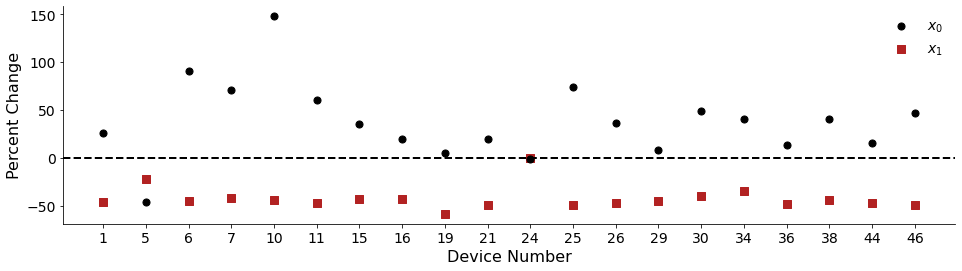

In [3]:
co2_comp = comparison.Parameter("co2","testhouse","chamber",suffix="wcwh_s21")
co2_comp.plot_diffs(save=False)

### Output
Rather than look at the parameters, now we consider the differences between the outputs of the models.

In [4]:
co2_out = comparison.Output("co2","testhouse","chamber","wcwh_s21","chamber")

Differences Calculated as: chamber - testhouse


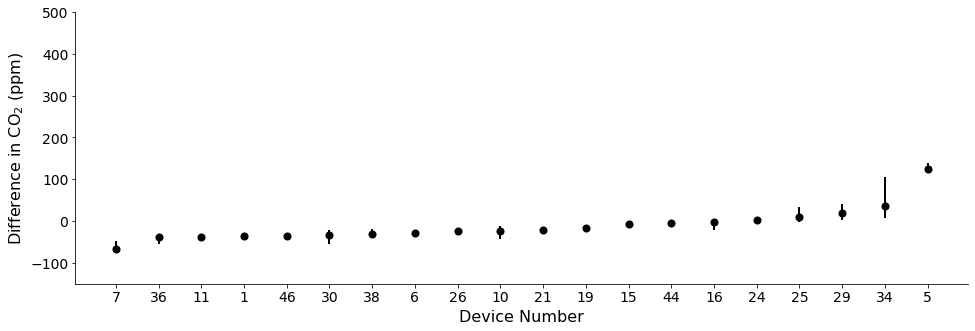

In [5]:
co2_out.get_errors(use_average=False,one_minus_two=False)
co2_out.plot_errors()

Differences Calculated as: chamber - testhouse


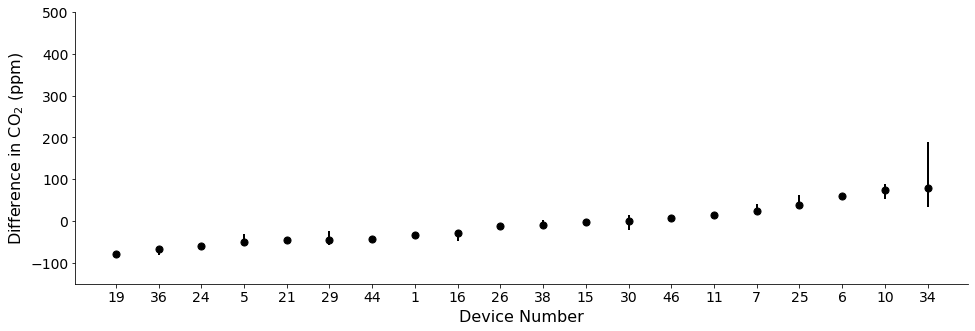

In [6]:
co2_out.get_errors(use_average=True,one_minus_two=False)
co2_out.plot_errors()

Differences Calculated as: chamber - testhouse
Differences Calculated as: chamber - testhouse


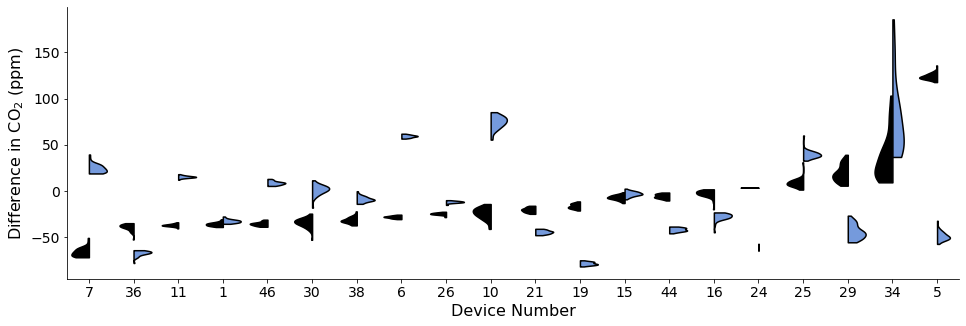

In [7]:
_ = co2_out.plot_combined_errors(one_minus_two=False, save=False)

Differences Calculated as: testhouse - chamber
False


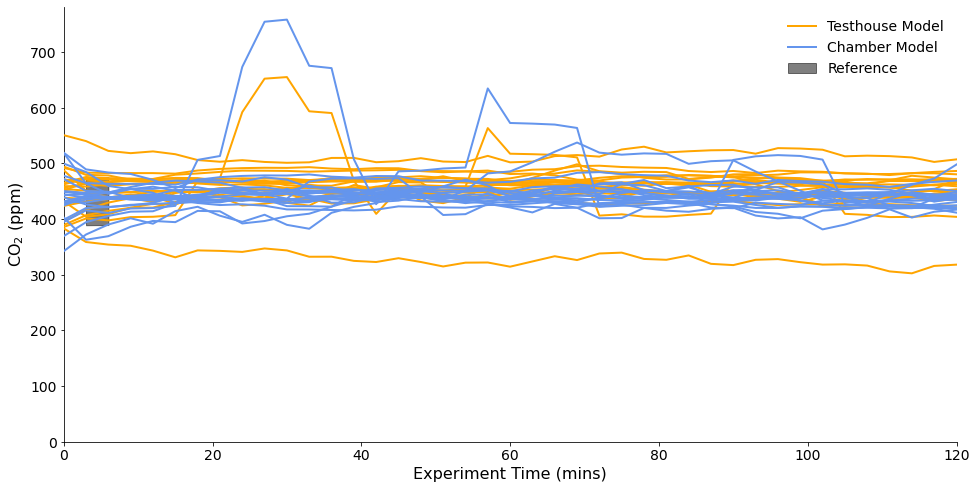

In [8]:
co2_out.get_errors(use_average=False)
co2_out.plot_corrected_measurements()

Differences Calculated as: testhouse - chamber
False


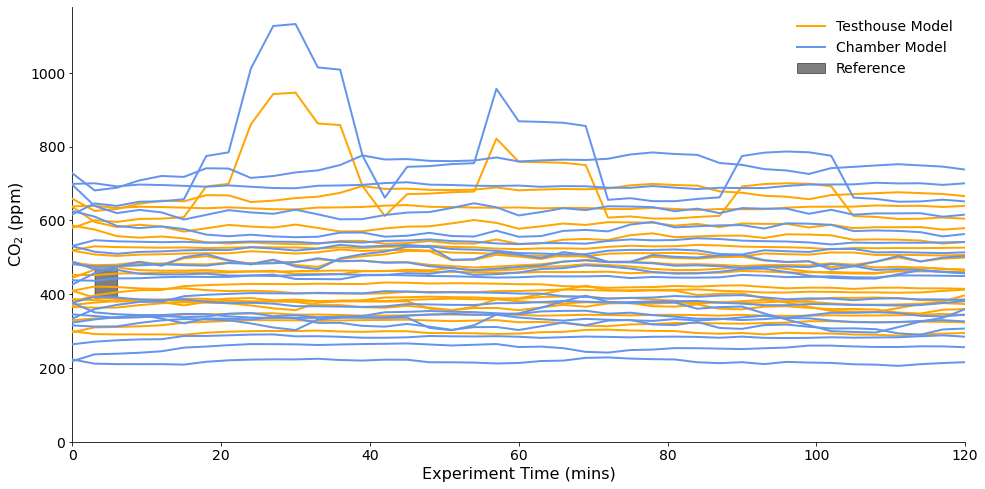

In [9]:
co2_out.get_errors(use_average=True)
co2_out.plot_corrected_measurements()

### Reference
Now we compare the results to the reference within each environment.

In [10]:
co2_ref = comparison.Reference(param="co2",
                               env1="testhouse",env2="chamber",
                               individual_beacons={"testhouse":[5,24],"chamber":[]},
                               suffix="wcwh_s21")

#### Comparing Environments
Comparing the output from environment models (device-specific and averaged) to their respective references

<div class="alert-block alert alert-danger">
These are not the figures to include in the paper although they could fit nicely into the appendix. Not sure they are really providing any insights since we are comparing models to their respective references. If the message is "model parameters are different", this figure does not illustrate that.
<div>

##### Device-Specific

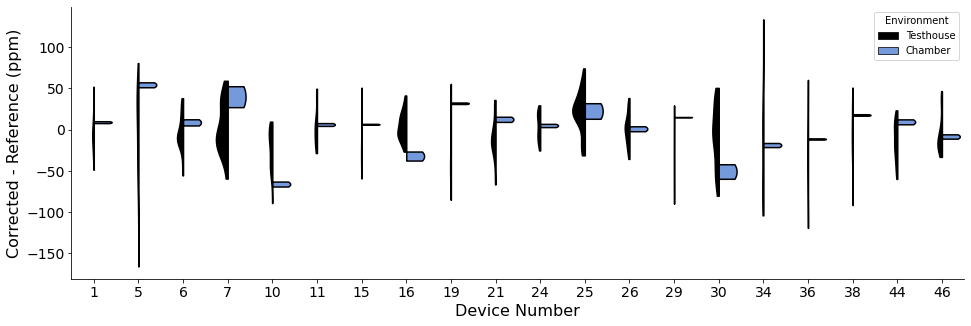

In [11]:
co2_ref.visualize_errors()

##### Environment-Averaged

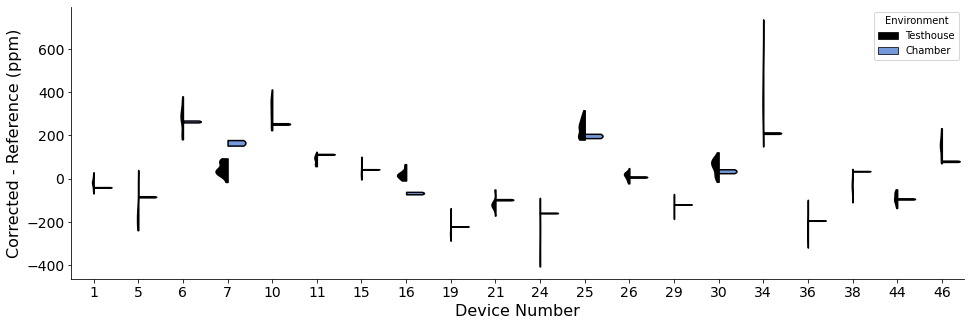

In [12]:
co2_ref.visualize_errors(correct_with_average=True)

#### Model Type
Comparing the differences error between device-specific and environment-averaged modle parameters.

##### Chamber

False


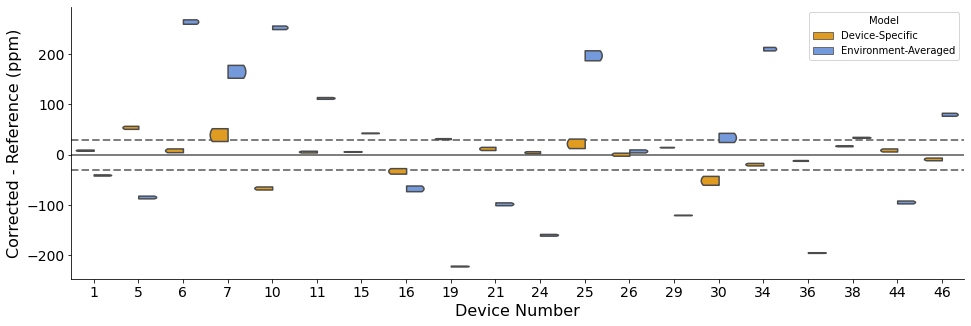

In [38]:
errors_chamber_models = co2_ref.compare_model_types("chamber",plot="v",save=False)

False


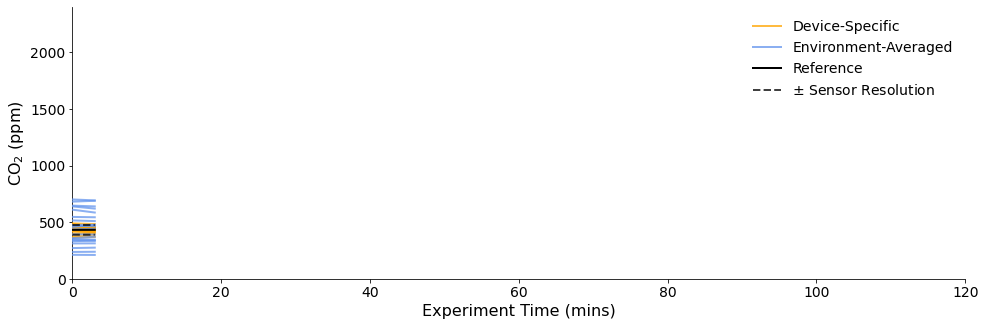

In [14]:
_ = co2_ref.compare_model_types("chamber",plot="ts",ylim=[0,2400],save=False)

##### Testhouse

False


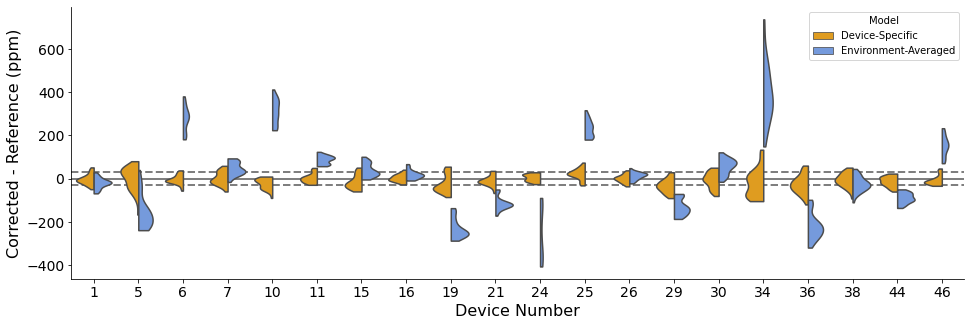

In [37]:
errors_testhouse_models = co2_ref.compare_model_types("testhouse",plot="v",save=False)

False


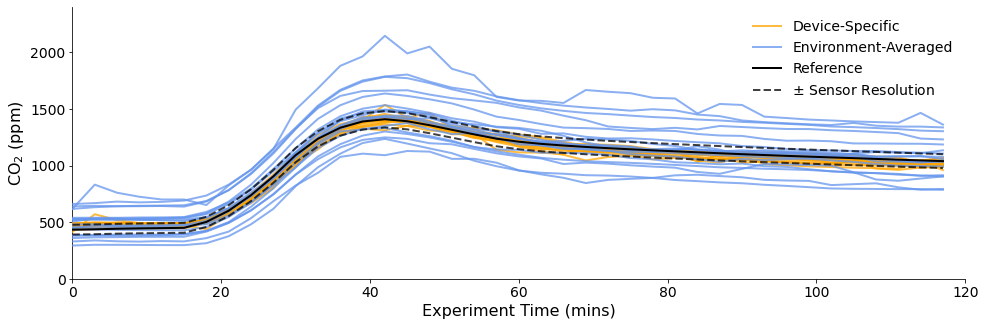

In [39]:
_ = co2_ref.compare_model_types("testhouse",plot="ts",ylim=[0,2400],save=False)

---

<a id="pm2p5_comparison"></a>

## Particulate Matter

### Parameters

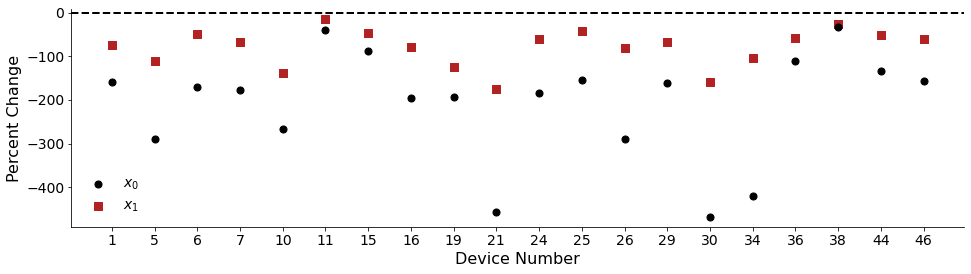

In [17]:
pm_comp = comparison.Parameter("pm2p5_mass","testhouse","chamber",suffix="wcwh_s21")
pm_comp.plot_diffs(save=False)

### Outputs

In [18]:
pm_out = comparison.Output("pm2p5_mass","testhouse","chamber","wcwh_s21","chamber")

Differences Calculated as: chamber - testhouse


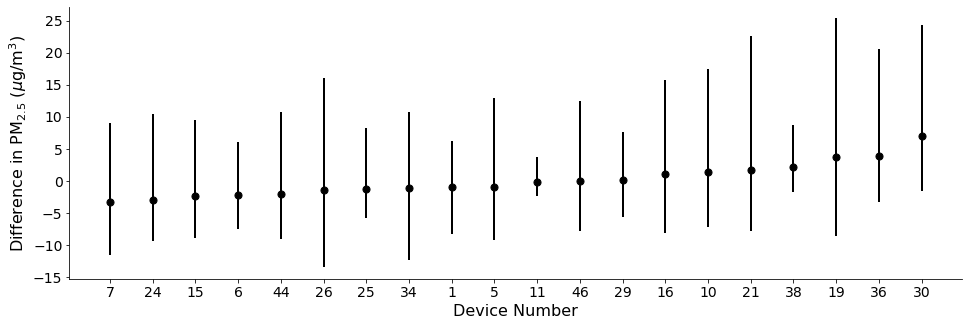

In [19]:
pm_out.get_errors(use_average=False,one_minus_two=False)
pm_out.plot_errors()

Differences Calculated as: chamber - testhouse


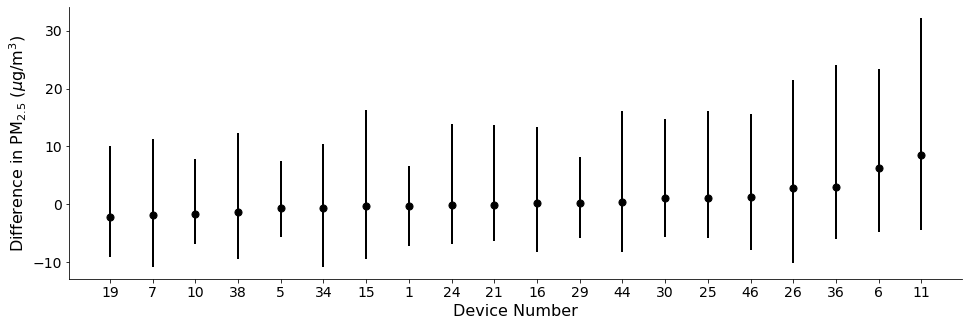

In [20]:
pm_out.get_errors(use_average=True,one_minus_two=False)
pm_out.plot_errors()

Differences Calculated as: chamber - testhouse
Differences Calculated as: chamber - testhouse


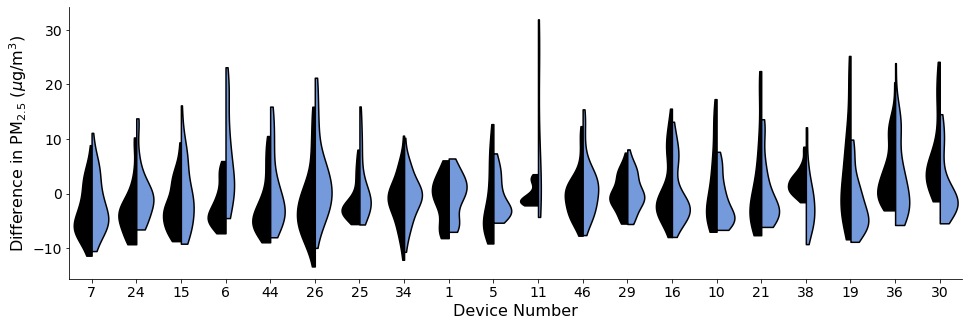

In [21]:
_ = pm_out.plot_combined_errors(one_minus_two=False, save=False)

### Reference

In [22]:
pm_ref = comparison.Reference(param="pm2p5_mass",
                               env1="testhouse",env2="chamber",
                               individual_beacons={"testhouse":[5,24],"chamber":[]},
                               suffix="wcwh_s21")

<div class="alert-block alert alert-danger">
    
Have to _manually_ delete data from Beacon 5 from the test data set that is generated.
    
<div>

<div class="alert-block alert alert-info">
Need to work on getting Beacon 24 included
<div>

#### Chamber

False


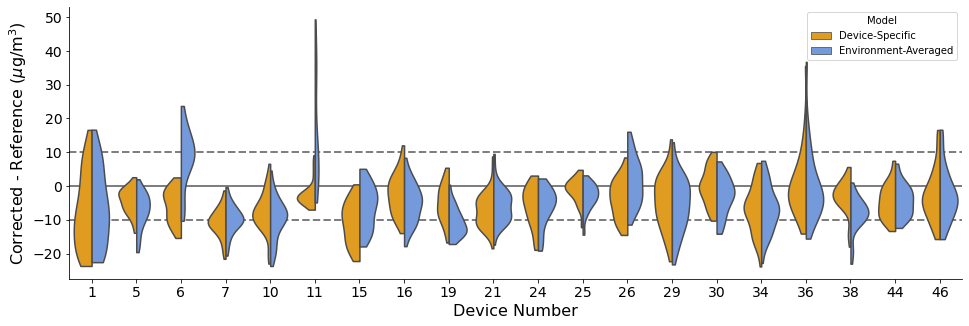

In [36]:
_ = pm_ref.compare_model_types("chamber",plot="v",save=False)

False


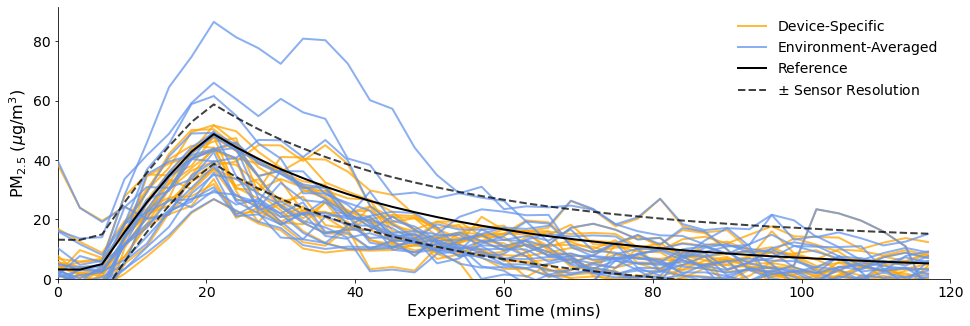

In [24]:
_ = pm_ref.compare_model_types("chamber",plot="ts",save=False)

#### Testhouse

False


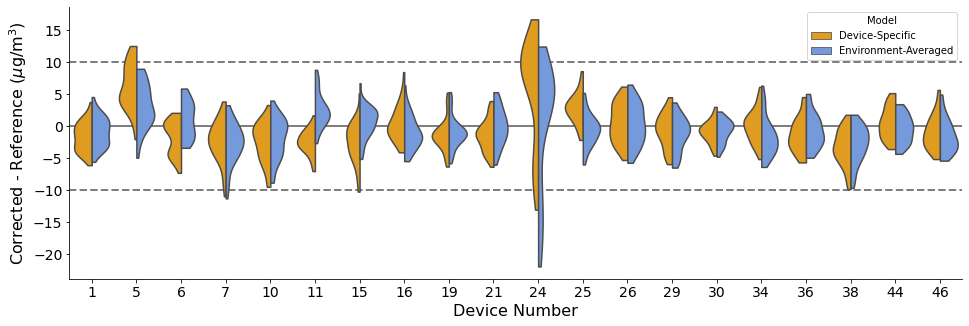

In [34]:
_ = pm_ref.compare_model_types("testhouse",plot="v",save=False)

False


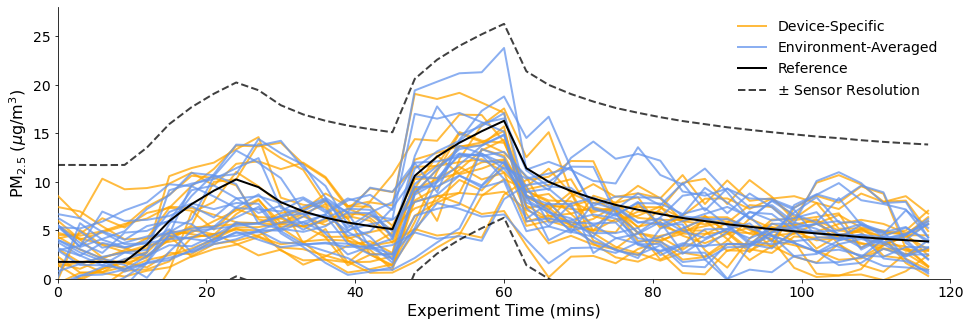

In [26]:
_ = pm_ref.compare_model_types("testhouse",plot="ts",save=False,percent=False)

---

## Carbon Monoxide
We will have to treat CO slighlty different since we have two environments but one is a constant model while the other is a linear model.

In [27]:
co_standard = pd.read_csv("../data/interim/co-linear_model-ux_s20.csv",index_col=0)
co_standard.dropna(inplace=True)
print("Number of Beacons:", len(co_standard))

Number of Beacons: 21


We only have 18 of the 20 devices because the CO sensor on Devices 19 and 46 went AWOL. 

### Getting Corrected Data 
Need to combine the corrected data into one file

#### Experiment Details
Start and stop times for the experiments

In [28]:
exp_details = pd.read_excel("../data/calibration/co_standard_experiment_details.xlsx",index_col=0)

In [29]:
print("Number of Beacons:", len(exp_details))
print(sorted(exp_details.index.values))

Number of Beacons: 21
[1, 5, 6, 7, 10, 11, 15, 16, 19, 21, 24, 25, 26, 29, 30, 32, 34, 36, 38, 44, 46]


#### Results
The final results from the calibration process

In [30]:
co_res = pd.read_csv("../data/interim/co-linear_model-ux_s20.csv",index_col=0)
co_res.dropna(inplace=True)

In [31]:
print("Number of Beacons:", len(co_res))
print(sorted(co_res.index.values))

Number of Beacons: 21
[1, 5, 6, 7, 10, 11, 15, 16, 19, 21, 24, 25, 26, 29, 30, 32, 34, 36, 38, 44, 46]


#### Corrected Data
Combining the corrected data from each of the beacons

In [32]:
pp = process.preprocess()
co_data = pd.DataFrame()
for bb in sorted(exp_details.index.values):
    s = exp_details.loc[bb,"start"]
    e = exp_details.loc[bb,"end"]
    pp.process([bb],datetime.strptime(s[9:-1],"%Y,%m,%d,%H,%M,%S"),datetime.strptime(e[9:-1],"%Y,%m,%d,%H,%M,%S"))
    print(f"Beacon: {bb}\n\tN: {len(pp.data)}\n\tStart:\t{s}\n\tEnd:\t{e}")
    if bb not in [32]:
        co_data = co_data.append(pp.data)

Beacon: 1
	N: 480
	Start:	datetime(2021,10,4,13,45,0)
	End:	datetime(2021,10,4,21,45,0)
Beacon: 5
	N: 0
	Start:	datetime(2021,10,12,8,35,0)
	End:	datetime(2021,10,12,16,35,0)
Beacon: 6
	N: 480
	Start:	datetime(2021,10,6,13,40,0)
	End:	datetime(2021,10,6,21,40,0)
Beacon: 7
	N: 0
	Start:	datetime(2021,10,4,13,45,0)
	End:	datetime(2021,10,4,21,45,0)


KeyError: 'tvoc'

In [ ]:
def show_comprehensive_co_timeseries(data,res,step_length=2,base_vals=[0,1,2,4],r=4,c=5,save=False,verbose=False,**kwargs):
    """shows a subplot of all the correlation beacons"""
    fig, axes = plt.subplots(r,c,figsize=(c*4,r*4),sharex=True,sharey=True,gridspec_kw={"wspace":0.1})
    data.sort_values(["beacon","timestamp"],axis="rows",inplace=True)
    for bb, ax in zip(res.index,axes.flat):
        # beacon data
        beacon = data[data["beacon"] == bb]
        # reference values
        ref_vals = []
        for val in base_vals:
            ref_vals += [val]*int(step_length*60)

        if verbose:
            print(f"Beacon {bb}: {len(beacon)}")
        
        if bb in [5,11,16,24]:
            ax.text(220,2,"Original\nData Lost",ha="center",va="center",fontsize=20)
        elif bb in [19,38,46]:
            ax.text(220,2,"Sensor\nMalfunction",ha="center",va="center",fontsize=20)
        else:
            ax.scatter(np.arange(len(beacon)),beacon["co"],color="firebrick",lw=2,s=5,zorder=20,label="Corrected")
            ax.plot(np.arange(len(ref_vals)),ref_vals,color="black",lw=2,zorder=10, label="Reference")
        
        if "min_val" in kwargs.keys():
            min_val = kwargs["min_val"]
        else:
            min_val = -0.5

        if "max_val" in kwargs.keys():
            max_val = kwargs["max_val"]
        else:
            max_val = 6

        ax.set_ylim([min_val,max_val])

        # annotating
        try:
            r2 = res.loc[bb,"score"]
        except ValueError:
            r2 = 0
        ax.set_title(f"  Device {int(bb)}\n  r$^2$ = {round(r2,3)}\n  y = {round(res.loc[bb,'coefficient'],2)}x + {round(res.loc[bb,'constant'],2)}",
                y=0.85,pad=0,fontsize=13,loc="left",ha="left")

        ax.set_xticks(np.arange(0,520,120))
        ax.axis('off')

    axes[r-1,0].axis('on')
    for loc in ["top","right"]:
        axes[r-1,0].spines[loc].set_visible(False)
    plt.setp(axes[r-1,0].get_xticklabels(), ha="center", rotation=0, fontsize=16)
    plt.setp(axes[r-1,0].get_yticklabels(), ha="right", rotation=0, fontsize=16)
    axes[r-1,0].legend(loc="upper center",bbox_to_anchor=(0.5,-0.1),ncol=2,frameon=False,fontsize=14)
    fig.add_subplot(111, frame_on=False)
    plt.tick_params(labelcolor="none", bottom=False, left=False)
    plt.xlabel("Experiment Time (min)",fontsize=18)
    plt.ylabel(f"{visualize.get_pollutant_label('co')} ({visualize.get_pollutant_units('co')})",fontsize=18)

    # removing any empty axes
    if len(data["beacon"].unique()) < r*c:
        for i in range(r*c-len(data["beacon"].unique())):
            axes.flat[-1*(i+1)].axis("off")

    if save:
        plt.savefig(f"../reports/figures/beacon_summary/calibration-co-standard-step_comparison-ux_s20.pdf",bbox_inches="tight")

    plt.show()
    plt.close()

In [ ]:
show_comprehensive_co_timeseries(co_data,co_res.drop([32],axis=0),r=4,c=5,save=False)

In [ ]:
print(round(co_res,2).to_latex())

### Comparing Constant and Linear Models
Not a totally fair comparison but it works

#### Constant Data

In [ ]:
co_constant = pd.read_csv("../data/interim/co-constant_model-ux_s20.csv",index_col=0)
co_constant["constant"] *= -1
co_constant.drop([32],axis=0,inplace=True)

#### ZAG Data
Constant model from the ZAG

In [ ]:
co_zag = pd.read_csv("../data/interim/co-constant_model-wcwh_s21.csv",index_col=0)
co_zag["constant"] *= -1

#### Plotting Differences

In [ ]:
def plot_diff_params(env1, env2, env1_label, env2_label, param="constant",save=False):
    """
    """
    merged = env1.merge(env2,left_index=True,right_index=True,suffixes=[f"_{env1_label}",f"_{env2_label}"])
    merged.sort_values([f"{param}_{env2_label}"],axis=0,inplace=True)
    #plotting
    _, ax = plt.subplots(figsize=(16,4))
    ax.scatter(np.arange(len(merged.index)),merged[f"{param}_{env1_label}"],label=env1_label,s=50,zorder=10,color="black")
    ax.scatter(np.arange(len(merged.index)),merged[f"{param}_{env2_label}"],label=env2_label,s=60,marker="s",zorder=1,color="firebrick")
    
    # x-axis
    ax.set_xticks(np.arange(len(merged.index)))
    ax.set_xticklabels(merged.index,fontsize=14)
    ax.set_xlabel("Device Number",fontsize=16)
    # y-axis
    ax.set_ylabel("$x_0$ (ppm)",fontsize=16)
    ax.set_yticks(np.arange(-4,14,2))
    
    ax.legend(frameon=False,fontsize=14)
    for loc in ["top","right"]:
        ax.spines[loc].set_visible(False)
    ax.tick_params(labelsize=16)
    
    if save:
        plt.savefig(f"../reports/figures/beacon_summary/calibration-co-env_comparison-ux_s20.pdf",bbox_inches="tight")
    plt.show()
    plt.close()
    
    return merged

In [ ]:
_ = plot_diff_params(co_res,co_constant,"standard","chamber",save=False)

In [ ]:
def plot_three_diffs(env1, env2, env3, env1_label, env2_label, env3_label, param="constant",save=False):
    """
    """
    merged = env1.merge(env2,left_index=True,right_index=True,suffixes=[f"_{env1_label}",f"_{env2_label}"])
    merged = merged.merge(env3,left_index=True,right_index=True)
    merged.sort_values([f"{param}_{env2_label}"],axis=0,inplace=True)
    merged.drop([19,38,46],axis=0,inplace=True)
    #plotting
    _, ax = plt.subplots(figsize=(16,4))
    ax.scatter(np.arange(len(merged.index)),merged[f"{param}_{env1_label}"],label=env1_label.title(),s=50,zorder=10,color="black")
    ax.scatter(np.arange(len(merged.index)),merged[f"{param}_{env2_label}"],label=env2_label.title(),s=60,marker="s",zorder=1,color="firebrick")
    ax.scatter(np.arange(len(merged.index)),merged[f"{param}"],label=env3_label.title(),s=55,marker="d",zorder=1,color="cornflowerblue")
    
    # x-axis
    ax.set_xticks(np.arange(len(merged.index)))
    ax.set_xticklabels(merged.index,fontsize=14)
    ax.set_xlabel("Device Number",fontsize=16)
    # y-axis
    ax.set_ylabel("$x_0$ (ppm)",fontsize=16)
    ax.set_yticks(np.arange(-4,14,2))
    
    ax.legend(frameon=False,fontsize=14)
    for loc in ["top","right"]:
        ax.spines[loc].set_visible(False)
    ax.tick_params(labelsize=16)
    
    if save:
        plt.savefig(f"../reports/figures/beacon_summary/calibration-co-env_comparison-ux_s20.pdf",bbox_inches="tight")
    plt.show()
    plt.close()
    
    return merged

In [ ]:
_ = plot_three_diffs(co_res,co_constant,co_zag,"step","chamber","zero",save=False)

---